In [89]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

load data

In [90]:
# source_name = 'qu_solar_PV_Power00-19.csv'
d1 = pd.read_csv('result_df/prevf_icaps_NC.csv', index_col=0) # OUT: Renewable installed PV Power GW
d2 = pd.read_csv('result_df/prevf_icapw_NC.csv', index_col=0) # OUT: Renewable installed Wind Power GW
df = pd.merge(d1, d2)

In [91]:
df

,Country,Years,Renewable installed PV Power GW,Renewable installed Wind Power GW
0,United States,2000,0.139,2.610
1,Germany,2000,0.089,6.113
2,China,2000,0.000,0.352
3,India,2000,0.000,1.220
4,United States,2001,0.029,1.635
...,...,...,...,...
75,India,2018,0.000,2.251
76,United States,2019,13.400,9.050
77,Germany,2019,3.700,2.090
78,China,2019,29.300,26.150


In [92]:
df['Years'].unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019])

In [93]:
df['Country'].unique()

array(['United States', 'Germany', 'China', 'India'], dtype=object)

In [94]:
df.columns

Index(['Country', 'Years', 'Renewable installed PV Power GW',
       'Renewable installed Wind Power GW'],
      dtype='object')

In [95]:
#df=df.rename(columns={'Energy intensity level of primary energy (MJ/2011 USD PPP) [6.1_PRIMARY.ENERGY.INTENSITY]':'Energy intensity level of primary energy (MJ/2011 USD PPP)'})
#df=df.rename(columns={'Total electricity output (GWh) [4.1.1_TOTAL.ELECTRICITY.OUTPUT]':'Total electricity output (GWh)'})

In [96]:
df

,Country,Years,Renewable installed PV Power GW,Renewable installed Wind Power GW
0,United States,2000,0.139,2.610
1,Germany,2000,0.089,6.113
2,China,2000,0.000,0.352
3,India,2000,0.000,1.220
4,United States,2001,0.029,1.635
...,...,...,...,...
75,India,2018,0.000,2.251
76,United States,2019,13.400,9.050
77,Germany,2019,3.700,2.090
78,China,2019,29.300,26.150


build plots for the countries we research

In [97]:
df.columns

Index(['Country', 'Years', 'Renewable installed PV Power GW',
       'Renewable installed Wind Power GW'],
      dtype='object')

In [98]:
dfg = df.groupby('Years').mean()
dfg = dfg.reset_index()

In [104]:
years = dfg['Years'].array

In [102]:
years

<PandasArray>
[2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
 2013, 2014, 2015, 2016, 2017, 2018, 2019]
Length: 20, dtype: int64

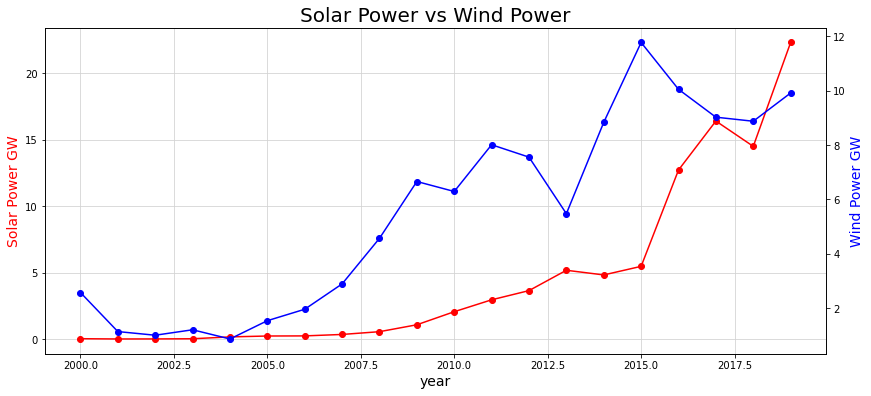

In [100]:
years = [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
 2013, 2014, 2015, 2016, 2017, 2018, 2019]

# create figure and axis objects with subplots()
fig,ax = plt.pyplot.subplots(1,1, figsize=(14,6))
ax.grid(color='lightgrey')

# make a plot
ax.plot(dfg['Years'], dfg['Renewable installed PV Power GW'], color="red", marker="o")
# set x-axis label
ax.set_xlabel("year",fontsize=14)
# set y-axis label
ax.set_ylabel("Solar Power GW",color="red",fontsize=14)

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(dfg['Years'], dfg['Renewable installed Wind Power GW'],color="blue",marker="o")
ax2.set_ylabel("Wind Power GW",color="blue",fontsize=14)
ax.set_title('Solar Power vs Wind Power', size = 20)

plt.pyplot.show()

# save the plot as a file
fig.savefig('Solar Power vs Wind Power.jpg',
            format='jpeg',
            dpi=100,
            bbox_inches='tight')